In [25]:
import pandas as pd
from IPython.display import display, Markdown

# Cargar el dataset
file_path = 'online_retail.csv'
data = pd.read_csv(file_path)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Número de filas duplicadas
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Número de filas duplicadas
data.duplicated().sum()

np.int64(5268)

In [ ]:
# Valores únicos por columna
unique_values = {col: data[col].unique() for col in data.columns}

# Mostrar resumen de valores únicos por columna
for col, values in unique_values.items():
  print(f'Columna: {col}')
  print(f'Número de valores únicos: {len(values)}')
  print(f'Valores únicos: {values[:10]}')
  print('-' * 50)

Columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

In [8]:
data_cleaned = data.drop_duplicates()

data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [9]:
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
data_cleaned.duplicated().sum()

np.int64(0)

In [11]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Columna > Total Amount < por transacción
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Convertimos la columna 'InvoiceDate' a tipo datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [ ]:
# Desglosar la columna 'InvoiceDate' en columnas temporales 'Year' y 'Month'
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month

# Mostrar las primeras filas con las nuevas columnas temporales agregadas
print(data_cleaned.head())

   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  
0  2010     12  
1  2010     12  
2  2010    

In [21]:
# Ventas totales por año $
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum().reset_index()
sales_by_year

,Year,TotalAmount
0,2010,552372.860
1,2011,7726146.564


In [ ]:
# Separamos por Semestre 1,2
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x:1 if x<=6 else 2)

In [ ]:
# ventas totales por semestre $
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester.reset_index()

,Year,Semester,TotalAmount
0,2010,2,552372.860
1,2011,1,3166939.041
2,2011,2,4559207.523


In [19]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2


In [ ]:
# Número total de devoluciones
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
total_returns

8872

In [ ]:
# Número total de no devoluciones
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0]
total_non_returns

392732

In [27]:
display(Markdown("## Gráficas de Devoluciones vs No Devoluciones"))

## Gráficas de Devoluciones vs No Devoluciones

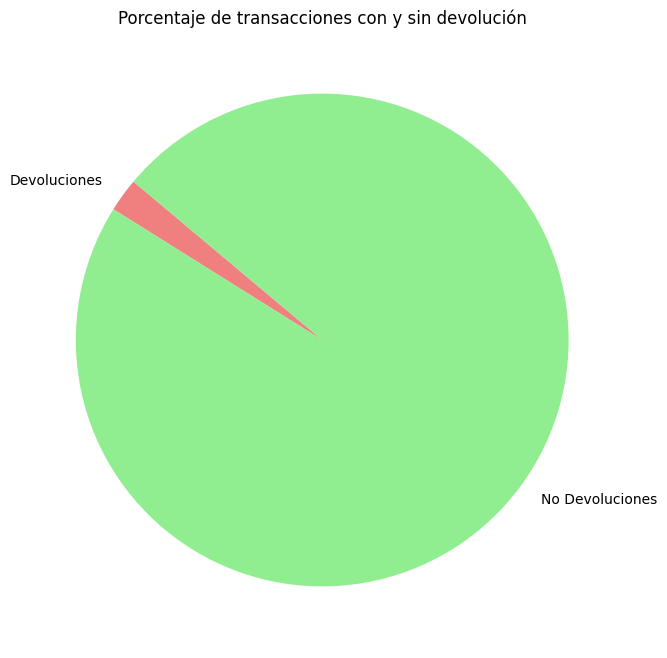

In [29]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No Devoluciones']
sizes = [total_returns, total_non_returns]
colors = ['lightcoral', 'lightgreen']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, colors= colors, startangle=140)

plt.title('Porcentaje de transacciones con y sin devolución')
plt.show()

In [30]:
# Crear una columna categórica basada en el monto total de la transacción (ejemplo: 'Low', 'Medium', 'High')
def categorize_total_amount(amount):
    if amount < 20:
        return 'Low'
    elif 20 <= amount < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)

# Mostrar las primeras filas con las nuevas columnas
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  Semester AmountCategory  
0  2010     12         2            Low  
1  2010     12      

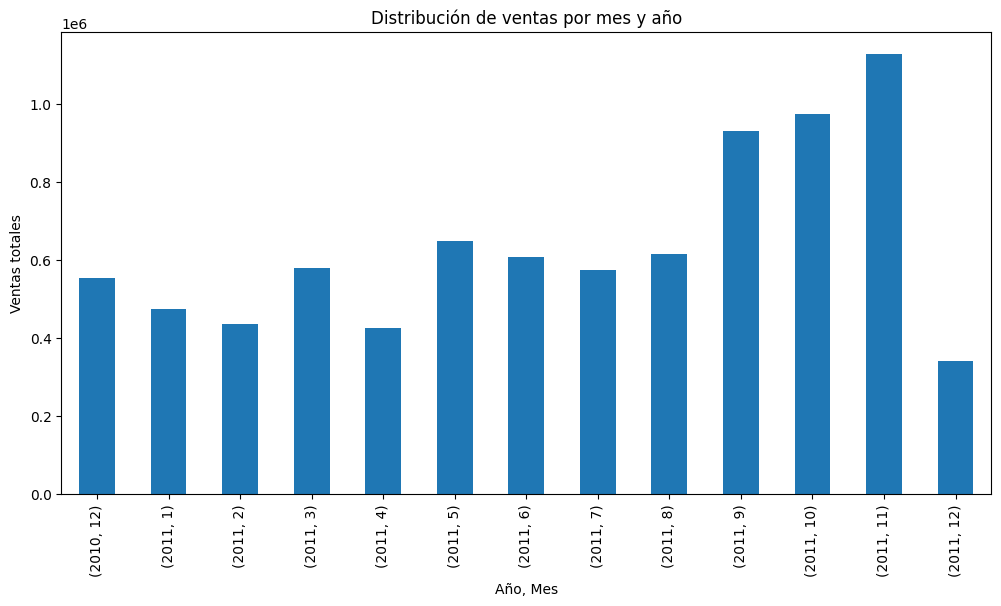

In [31]:
plt.figure(figsize=(12,6))
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Distribución de ventas por mes y año')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas totales')
plt.show()

In [ ]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

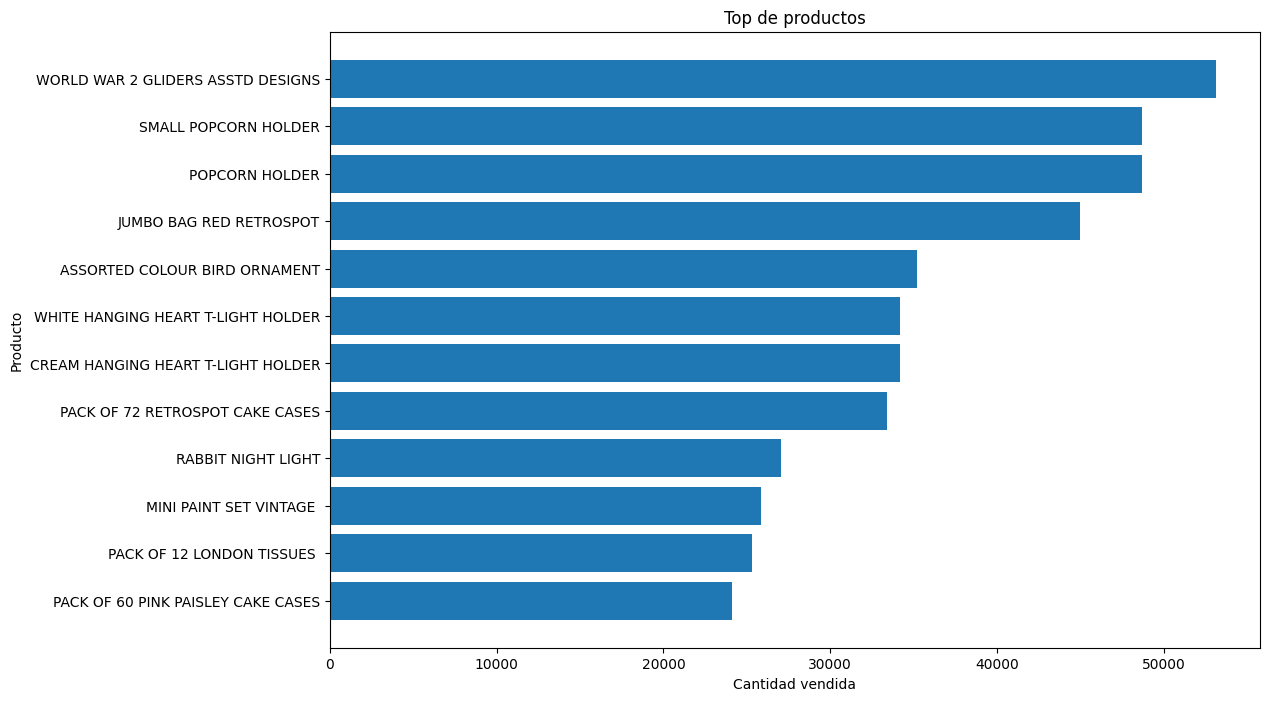

In [32]:
plt.figure(figsize=(12,8))
plt.barh(top_products['Description'],top_products['Quantity'])
plt.title('Top de productos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()